# Local Binary Patterns

http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.local_binary_pattern  
http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html 

In [7]:
%matplotlib inline

In [8]:
import numpy as np
import cv2 
import matplotlib
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import skimage.feature as ft
import scipy.ndimage as nd
from scipy.stats import itemfreq

# Carrega imagens de referencia

## Estas imagens, já são áreas de interesse: Tijolos, Grama, Pele de cobra

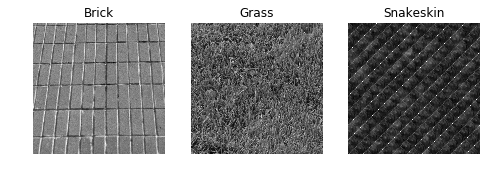

In [9]:
brick = data.load('brick.png')
grass = data.load('grass.png')
Snakeskin = cv2.cvtColor(cv2.imread("./images/Snakeskin.jpg"), cv2.COLOR_BGR2GRAY)

#mostra imagens
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
  
ax1.axis('off')
ax1.imshow(brick, cmap=plt.cm.gray)
ax1.set_title('Brick')
  
ax2.axis('off')
ax2.imshow(grass, cmap=plt.cm.gray)
ax2.set_title('Grass')

ax3.axis('off')
ax3.imshow(Snakeskin, cmap=plt.cm.gray)
ax3.set_title('Snakeskin')

plt.show()

# Calcula o LBP para cada imagem

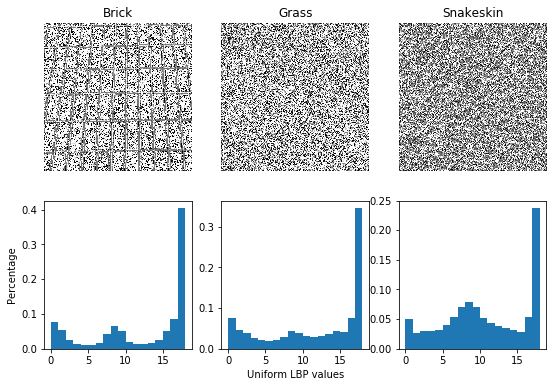

In [10]:
# settings for LBP
METHOD = 'uniform'
P = 16 # número de vizinhos
R = 2 # raio

refs = {
    'brick': ft.local_binary_pattern(brick, P, R, METHOD),
    'grass': ft.local_binary_pattern(grass, P, R, METHOD),
    'Snakeskin': ft.local_binary_pattern(Snakeskin, P, R, METHOD)
}

#mostra imagens e histograma
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
  
ax1.axis('off')
ax1.imshow(refs['brick'], cmap=plt.cm.gray)
ax1.set_title('Brick')
  
ax2.axis('off')
ax2.imshow(refs['grass'], cmap=plt.cm.gray)
ax2.set_title('Grass')

ax3.axis('off')
ax3.imshow(refs['Snakeskin'], cmap=plt.cm.gray)
ax3.set_title('Snakeskin')


ax4.hist(refs['brick'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax4.set_ylabel('Percentage')
ax5.hist(refs['grass'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))
ax5.set_xlabel('Uniform LBP values')
ax6.hist(refs['Snakeskin'].ravel(), normed=True, bins=P + 2, range=(0, P + 2))

plt.show()

# Agora vamos calcular a similaridade dos histogramas

## Para isso, primeiro:

* Extraimos a frequencia dos valores com o método ** itemfreq **
* Normatizamos ente 0 e 1:   x/sum() 


In [11]:
def CalcHistogram(lbpImage):
    freq = itemfreq(lbpImage.ravel())
    hist = freq / sum(freq)
    return np.array(hist, dtype=np.float32)

#print( CalcHistogram(refs['brick']) )
#print( CalcHistogram(refs['grass']) )

# Comparando as três imagens

Quanto MENOR o score, MELHOR

In [12]:
def Compare(nome, lbpImage):
    
    #CV_COMP_CORREL Correlation
    #CV_COMP_CHISQR Chi-Square
    #CV_COMP_INTERSECT Intersection
    #CV_COMP_BHATTACHARYYA Bhattacharyya distance

    score1 = cv2.compareHist(CalcHistogram(lbpImage), CalcHistogram(refs['brick']), cv2.HISTCMP_CHISQR)
    score2 = cv2.compareHist(CalcHistogram(lbpImage), CalcHistogram(refs['grass']), cv2.HISTCMP_CHISQR)
    score3 = cv2.compareHist(CalcHistogram(lbpImage), CalcHistogram(refs['Snakeskin']), cv2.HISTCMP_CHISQR)
    
    print()
    print("Comparando %s com as imagens"%nome, " (",score1,",", score2,",", score3,")")
    
    if (score1 < score2 and score1 < score3):
        print("É BRICK")
    
    if (score2 < score1 and score2 < score3):
        print("É GRASS")
    
    if (score3 < score1 and score3 < score2):
        print("É SNAKESKIN")    
        
Compare("BRICKS", refs['brick'])    
Compare("GRASS", refs['grass'])    
Compare("SNAKESKIN", refs['Snakeskin'])    
    


Comparando BRICKS com as imagens  ( 0.0 , 0.13791370718375934 , 0.5040062245750824 )
É BRICK

Comparando GRASS com as imagens  ( 0.09090442734524364 , 0.0 , 0.268735243281684 )
É GRASS

Comparando SNAKESKIN com as imagens  ( 0.345593608280921 , 0.2005889610495797 , 0.0 )
É SNAKESKIN


# Comparando com imagens de gramas


Comparando Grass (1).jpg com as imagens  ( 0.9333969594823069 , 0.6355591777909904 , 2.8016383808437144 )
É GRASS

Comparando Grass (2).jpg com as imagens  ( 1.7399658034657277 , 1.2752016021451489 , 4.9528473812589855 )
É GRASS

Comparando Grass (3).jpg com as imagens  ( 0.41971541637200194 , 0.2284448491308668 , 1.327287406655247 )
É GRASS

Comparando Grass (4).jpg com as imagens  ( 1.3501197095910824 , 0.9494528347113248 , 3.8846289989338887 )
É GRASS

Comparando Grass (5).jpg com as imagens  ( 0.7624979003534377 , 0.5268656622200187 , 2.440164112572889 )
É GRASS

Comparando Grass (6).jpg com as imagens  ( 0.8210220720114771 , 0.5552885730673599 , 2.555494583360099 )
É GRASS

Comparando Grass (7).jpg com as imagens  ( 0.47213051480095664 , 0.31455299401680303 , 1.6836203975364874 )
É GRASS

Comparando Grass (8).jpg com as imagens  ( 0.7834747887455711 , 0.5273156928403487 , 2.474850658465782 )
É GRASS

Comparando Grass (9).png com as imagens  ( 0.36091437342122445 , 0.3552196551203

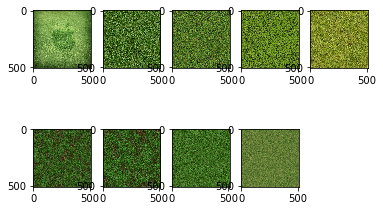

In [13]:
import os

path_0 = "./images/grass/"

pos = 1
for filename in os.listdir(path_0):
    img = cv2.imread(os.path.join(path_0, filename))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbpImage = ft.local_binary_pattern(image, P, R, METHOD)
    Compare(filename, lbpImage)

    plt.subplot(2,5,pos) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    pos = pos + 1

plt.show()
    

# Comparando com imagens de parede de tijolos


Comparando Brick (1).jpg com as imagens  ( 0.09186794294000032 , 0.14782243532285674 , 0.6982438867007048 )
É BRICK

Comparando Brick (2).jpg com as imagens  ( 0.06486072461607709 , 0.21373978723295195 , 0.9960973042690531 )
É BRICK

Comparando Brick (3).jpg com as imagens  ( 0.23535365635324068 , 0.4920797572677104 , 1.832848550320282 )
É BRICK

Comparando Brick (4).jpg com as imagens  ( 0.1575717496445739 , 0.2072991239174088 , 0.9803586450451528 )
É BRICK

Comparando Brick (5).jpg com as imagens  ( 0.016983302665943802 , 0.21326028185940263 , 0.6875097320741154 )
É BRICK

Comparando Brick (6).jpg com as imagens  ( 0.02118296880083035 , 0.060805115913472964 , 0.34317857179007005 )
É BRICK

Comparando Brick (7).jpg com as imagens  ( 0.025637172675080578 , 0.1310123308905031 , 0.6946431985609929 )
É BRICK

Comparando Brick (8).jpg com as imagens  ( 0.36275852648497464 , 0.8452799266626849 , 2.5116099090807578 )
É BRICK

Comparando Brick (9).jpg com as imagens  ( 0.24985706482995734 , 

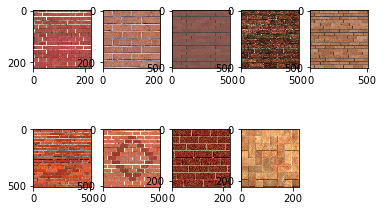

In [14]:

path_0 = "./images/brick/"

pos = 1
for filename in os.listdir(path_0):
    img = cv2.imread(os.path.join(path_0, filename))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbpImage = ft.local_binary_pattern(image, P, R, METHOD)
    Compare(filename, lbpImage)

    plt.subplot(2,5,pos) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    pos = pos + 1

plt.show()  
    


# Comparando com imagens de peles de cobras



Comparando Snakeskin (1).jpg com as imagens  ( 0.3153409345855539 , 0.21515918503360512 , 0.05191974716096819 )
É SNAKESKIN

Comparando Snakeskin (2).jpg com as imagens  ( 0.9699387496782613 , 0.6994678000148 , 0.1416157619258336 )
É SNAKESKIN

Comparando Snakeskin (3).jpg com as imagens  ( 0.23006320746749245 , 0.16483661623097434 , 0.04053779999591883 )
É SNAKESKIN

Comparando Snakeskin (4).jpg com as imagens  ( 0.3776633185846049 , 0.25435077068791606 , 0.02182326762823516 )
É SNAKESKIN

Comparando Snakeskin (5).jpg com as imagens  ( 0.4256831836700593 , 0.30637687724524554 , 0.055407417352064926 )
É SNAKESKIN

Comparando Snakeskin (6).jpg com as imagens  ( 0.15300531855857208 , 0.1379088969488067 , 0.0785807490079187 )
É SNAKESKIN

Comparando Snakeskin (7).jpg com as imagens  ( 3.176270948731732 , 3.6391946631050787 , 3.0687511526268922 )
É SNAKESKIN

Comparando Snakeskin (8).jpg com as imagens  ( 0.16258697683097473 , 0.10726183707388984 , 0.07955809823081061 )
É SNAKESKIN

Compa

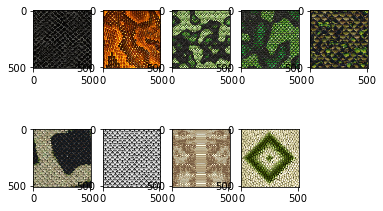

In [15]:
path_0 = "./images/snakeskin/"

pos = 1
for filename in os.listdir(path_0):
    img = cv2.imread(os.path.join(path_0, filename))
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbpImage = ft.local_binary_pattern(image, P, R, METHOD)
    Compare(filename, lbpImage)

    plt.subplot(2,5,pos) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    pos = pos + 1

plt.show()    

In [5]:
print (brick.ravel().shape)

(262144,)
